In [1]:
# importing the necessary libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# set the working directory
os.chdir("E:/documents")
os.getcwd()

'E:\\documents'

In [3]:
#read the data
train=pd.read_csv("delivery train.csv")

In [4]:
# checking the data types of the variables
train.dtypes

id                         int64
week                       int64
center_id                  int64
meal_id                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
dtype: object

# Remove duplicate elements 

In [4]:
#Removing duplicate elements from the data
print(train.duplicated().sum())
#train.head()
train=train.drop_duplicates()

0


# Missing value analysis

In [5]:
train.isna().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

''

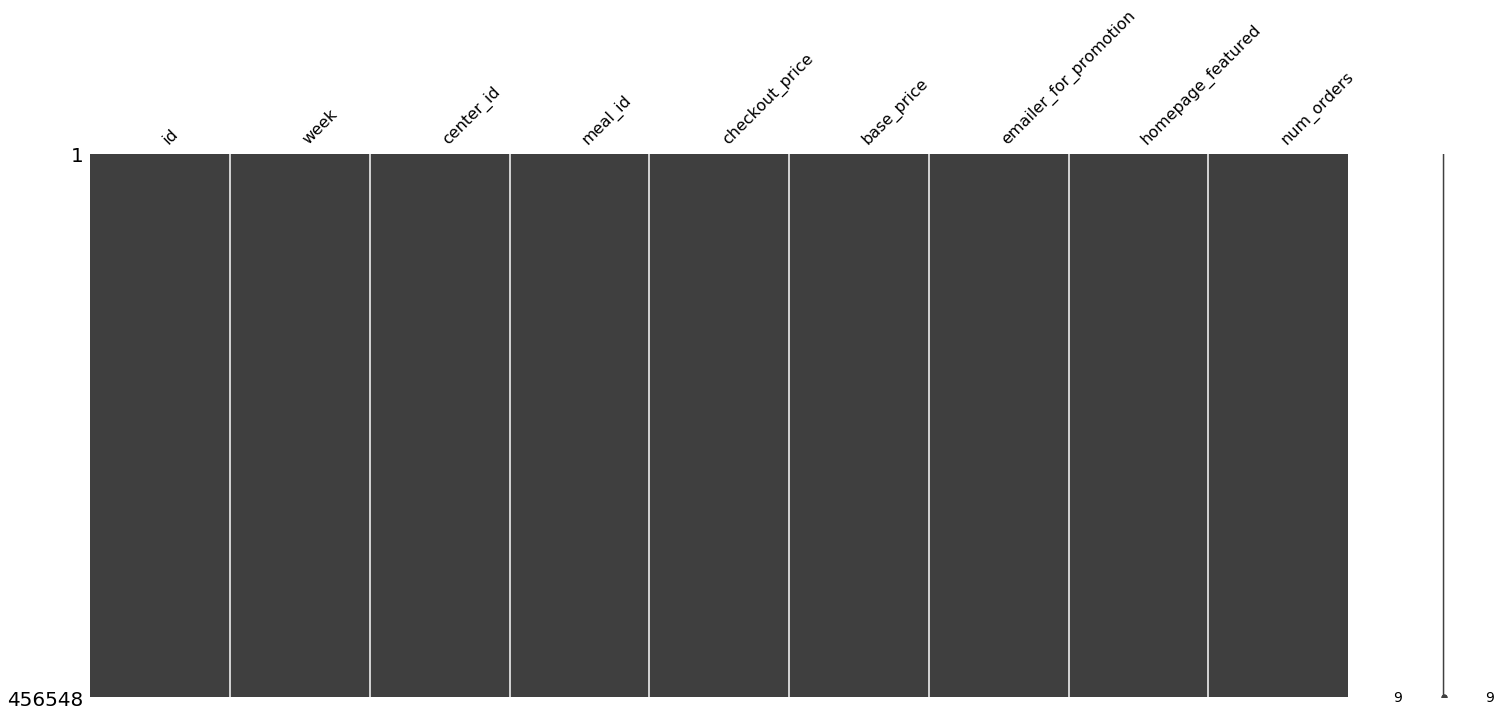

In [6]:
#finding missing values by observing graph
#pip install missingno
import missingno
missingno.matrix(train)  #there is no missing values as per the graph
;

In [10]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [13]:
train.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


In [12]:
train.dtypes

id                         int64
week                       int64
center_id                  int64
meal_id                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
dtype: object

# Changing the varibles to proper datatype

In [15]:
for i in train.columns:
    print('no of unique value in {} is {} and datatype is {}'.format(i,train[i].nunique(),train[i].dtype))

no of unique value in id is 456548 and datatype is int64
no of unique value in week is 145 and datatype is int64
no of unique value in center_id is 77 and datatype is int64
no of unique value in meal_id is 51 and datatype is int64
no of unique value in checkout_price is 1992 and datatype is float64
no of unique value in base_price is 1907 and datatype is float64
no of unique value in emailer_for_promotion is 2 and datatype is int64
no of unique value in homepage_featured is 2 and datatype is int64
no of unique value in num_orders is 1250 and datatype is int64


we can see that we need to convert the data types of some variables

In [4]:
lis=['week','center_id','meal_id','emailer_for_promotion','homepage_featured']

In [5]:
for j in lis:
    train[j]=train[j].astype('object')

In [21]:
train.dtypes

id                         int64
week                      object
center_id                 object
meal_id                   object
checkout_price           float64
base_price               float64
emailer_for_promotion     object
homepage_featured         object
num_orders                 int64
dtype: object

# Seperate the variables based on datatypes

In [6]:
train_num=train.select_dtypes(exclude=['object'])

In [7]:
train_cat=train.select_dtypes(include=['object'])

In [10]:
train_num.shape

(456548, 4)

In [11]:
train_cat.shape

(456548, 5)

# feature generation 

In [8]:
train['discount']=train['checkout_price']-train['base_price']

# Dealing with outliers

In [9]:
low=0.01
high=0.99
train_num.quantile([low,high])

,id,checkout_price,base_price,num_orders
0.01,1004998.47,96.03,115.43,13.0
0.99,1495001.53,708.13,726.53,1796.0


In [10]:
def outliers(variable):
    low=0.01
    high=0.99
    new=train.quantile([low,high])
    l=new[variable][low]
    print('low-{}'.format(l))
    h=new[variable][high]
    print('high-{}'.format(h))
    lc=len(train[train[variable]<=l])
    hc=len(train[train[variable]>=h])
    t=len(train)
    print('percentage of outliers-{}'.format(((lc+hc)/t)*100))
    #assigning the higher and the lower values in the place of outliers
    train.loc[train[variable]<l,variable]=l
    train.loc[train[variable]>h,variable]=h
    

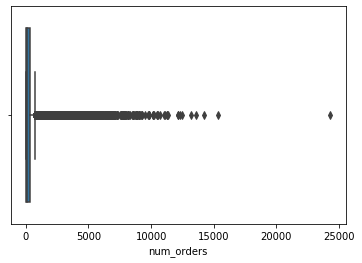

In [11]:
sns.boxplot(x=train['num_orders'])
# It has outliers so we have to deal with outliers first

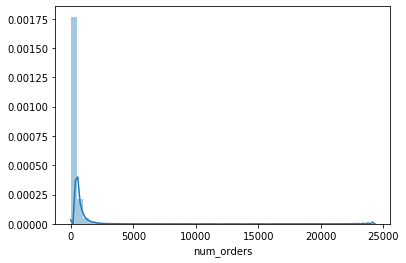

In [35]:
plt.figure(figsize=(6,4))
sns.distplot(train['num_orders'])

Since it is a skewed distribution we can say that this variable has outliers and we have to convert into normal distribution form

In [12]:
outliers("num_orders")

low-13.0
high-1796.0
percentage of outliers-3.721843048266557


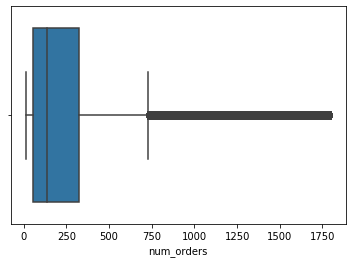

In [13]:
sns.boxplot(train['num_orders'])
# we remove the outliers to some extent

we can see that the outliers are removed to some extent

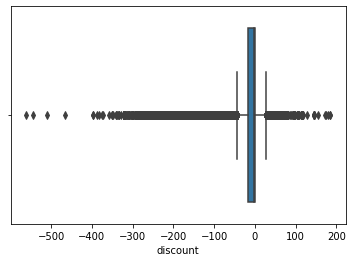

In [39]:
sns.boxplot(train['discount'])

In [14]:
outliers('discount')

low--226.98000000000002
high-2.0
percentage of outliers-9.927105145570673


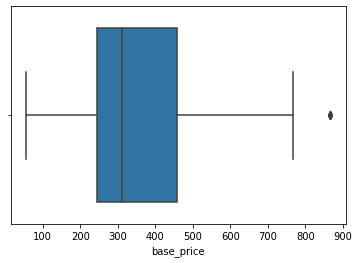

In [41]:
sns.boxplot(train['base_price'])

No outliers present in the base_price variable

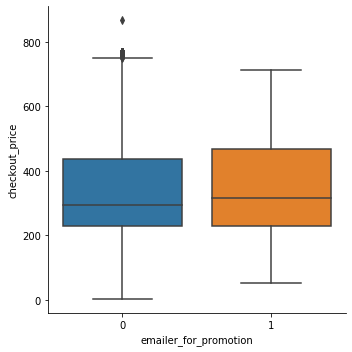

In [128]:
sns.catplot(y='checkout_price',x='emailer_for_promotion',kind='box',data=train)

# find the most frequently ordered meal

In [13]:
train.groupby('meal_id')['num_orders'].sum().sort_values(ascending=False)
# This is the short method to find the most ordered meal

meal_id
2290    8275694.0
1885    7939301.0
1993    6525236.0
1754    6090041.0
1109    6076898.0
2707    5845917.0
1971    5026759.0
2826    4991655.0
1062    4711713.0
1727    4445884.0
2664    3892881.0
2490    3490313.0
2569    3327376.0
1778    3308383.0
2539    3228743.0
1962    3228087.0
2581    2396692.0
2322    2296585.0
2640    2085360.0
1230    1843860.0
1207    1800641.0
1558    1748940.0
1525    1718770.0
2704    1610896.0
1878    1542027.0
1311    1489681.0
1803    1477018.0
2760    1428012.0
2631    1089983.0
1445    1059221.0
2577    1021735.0
1198    1018280.0
2444     942568.0
1248     874223.0
1543     791037.0
2867     713925.0
2304     609378.0
2126     597580.0
2492     540339.0
1216     533564.0
2306     506600.0
1571     404932.0
1438     395084.0
2139     380997.0
2494     366927.0
2956     307070.0
1847     277635.0
1247     231897.0
1902     209242.0
1770     190709.0
2104     159957.0
Name: num_orders, dtype: float64

# OR

In [9]:
#train_ch=train['num_orders']
#train_ch=pd.DataFrame(train_ch)
arr=train['meal_id'].unique()
arr=pd.DataFrame(arr)

In [10]:
arr.columns=['uniq']
arr.head()

,uniq
0,1885
1,1993
2,2539
3,2139
4,2631


In [12]:
arr1=[]
for i in arr['uniq']:
    total=0
    for j in range(0,(len(train)-1)):
        if(train['meal_id'].iloc[j]==i):
            total=total+train['num_orders'].iloc[j]
    arr1.append(total)
    

In [13]:
train['num_orders'].sum()
#total num of orders is 119557485

119557485

In [14]:
arr1=pd.DataFrame(arr1)

In [15]:
arr2=pd.concat([arr['uniq'],arr1],axis=1)

In [16]:
arr2=arr2.rename(columns={0:'meal_orders'})

In [18]:
arr2=arr2.sort_values('meal_orders',ascending= False)

In [19]:
arr2.head()

,uniq,meal_orders
12,2290,9770303
0,1885,8346246
19,1754,6818059
1,1993,6656856
14,1109,6367773


#we can see that order no 2290 is the most repeated item from the all

In [42]:
#since id column is the unique id for every order we can drop that variable
train=train.drop(columns=['id'])

# Finding the correlation

In [45]:
train.head()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,discount
0,1,55,1885,136.83,152.29,0,0,177.0,-15.46
1,1,55,1993,136.83,135.83,0,0,270.0,1.00
2,1,55,2539,134.86,135.86,0,0,189.0,-1.00
3,1,55,2139,339.50,437.53,0,0,54.0,-98.03
4,1,55,2631,243.50,242.50,0,0,40.0,1.00


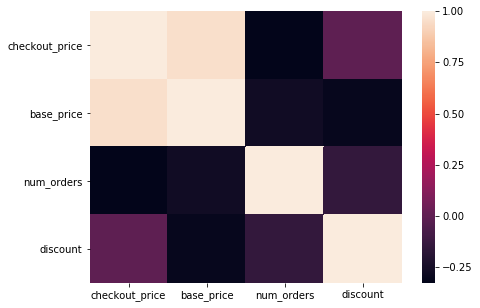

In [44]:
f,ax=plt.subplots(figsize=(7,5))
corr=train.corr()
sns.heatmap(corr)

In [46]:
corr

,checkout_price,base_price,num_orders,discount
checkout_price,1.000000,0.953389,-0.326874,-0.003927
base_price,0.953389,1.000000,-0.266894,-0.304616
num_orders,-0.326874,-0.266894,1.000000,-0.149861
discount,-0.003927,-0.304616,-0.149861,1.000000


We can observe that the base_price and the checkout_price has the high correlation value of 0.95 so we should drop one of the variable

In [15]:
train.drop(columns=['checkout_price'],inplace=True)
#checkout price and the base price are highly correlated

In [48]:
train.head()

,week,center_id,meal_id,base_price,emailer_for_promotion,homepage_featured,num_orders,discount
0,1,55,1885,152.29,0,0,177.0,-15.46
1,1,55,1993,135.83,0,0,270.0,1.00
2,1,55,2539,135.86,0,0,189.0,-1.00
3,1,55,2139,437.53,0,0,54.0,-98.03
4,1,55,2631,242.50,0,0,40.0,1.00


# Univariate analysis of data

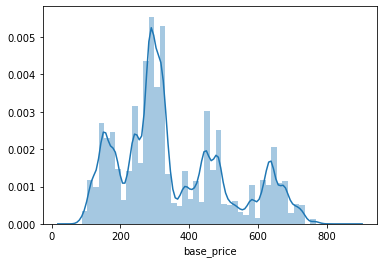

In [50]:
sns.distplot(train['base_price'],kde=True)

It doesn't follow any distribution 

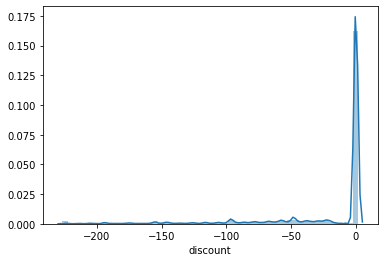

In [51]:
sns.distplot(train['discount'],kde=True)

discount resembles the normal distribution with some outliers

# Bivariate analysis

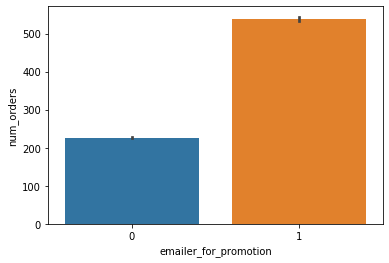

In [53]:
sns.barplot(x='emailer_for_promotion',y='num_orders',data=train)

#from this we observed that email advertisement has more effect on the num of orders when compared to normal one

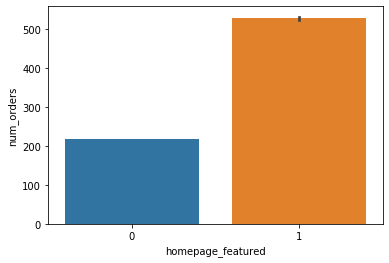

In [54]:
sns.barplot(x='homepage_featured',y='num_orders',data=train)

homepage_featured items has large effect on num of orders

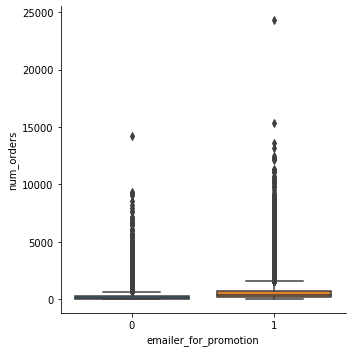

In [22]:
sns.catplot(x='emailer_for_promotion',y='num_orders',kind='box',data=train)

In [72]:
train.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'discount'],
      dtype='object')

# percentage of orders got discount?

In [32]:
val=np.where(train['discount']>0)
val=pd.DataFrame(val)
val.shape

(1, 116101)

In [26]:
train['discount'].shape

(456548,)

In [33]:
116101/456548

0.254301847779423

By this we have observed that 25 percent of orders get the discount

In [21]:
train.head()

,week,center_id,meal_id,base_price,emailer_for_promotion,homepage_featured,num_orders,discount
0,1,55,1885,152.29,0,0,177.0,-15.46
1,1,55,1993,135.83,0,0,270.0,1.00
2,1,55,2539,135.86,0,0,189.0,-1.00
3,1,55,2139,437.53,0,0,54.0,-98.03
4,1,55,2631,242.50,0,0,40.0,1.00


In [40]:
train.head()

,center_id,meal_id,base_price,emailer_for_promotion,homepage_featured,num_orders,discount
0,161.793432,715.768211,152.29,0,0,177.0,-15.46
1,161.793432,587.012954,135.83,0,0,270.0,1.00
2,161.793432,308.941058,135.86,0,0,189.0,-1.00
3,161.793432,42.813462,437.53,0,0,54.0,-98.03
4,161.793432,104.224804,242.50,0,0,40.0,1.00


# likelihood encoding, impact coding or target coding

It's a difficult task to encode this center_id and meal_id variables using one_hot_encoding because it increases the dimension of the data. so we can use target encoding to use this variables in the prediction.

In [55]:
train['center_id'].nunique()

77

In [56]:
train['meal_id'].nunique()

51

In [65]:
train['week'].nunique()

145

In [16]:
# Dealing with categorical variables
# Target encoding of center_id variable
me=train.groupby('center_id')['num_orders'].mean().sort_values(ascending=False)

In [17]:
# Convert to dictionary
me=me.to_dict()

In [18]:
# Mapping the mean of the num_orders to the center_id
train['center_id']=train['center_id'].map(me)

In [60]:
train.head()

,week,center_id,meal_id,base_price,emailer_for_promotion,homepage_featured,num_orders,discount
0,1,161.793432,1885,152.29,0,0,177.0,-15.46
1,1,161.793432,1993,135.83,0,0,270.0,1.00
2,1,161.793432,2539,135.86,0,0,189.0,-1.00
3,1,161.793432,2139,437.53,0,0,54.0,-98.03
4,1,161.793432,2631,242.50,0,0,40.0,1.00


In [19]:
# Target encoding of meal_id variable
me1=train.groupby('meal_id')['num_orders'].mean().sort_values(ascending=False)

In [20]:
me1=me1.to_dict()

In [21]:
train['meal_id']=train['meal_id'].map(me1)

In [64]:
train.head()

,week,center_id,meal_id,base_price,emailer_for_promotion,homepage_featured,num_orders,discount
0,1,161.793432,715.768211,152.29,0,0,177.0,-15.46
1,1,161.793432,587.012954,135.83,0,0,270.0,1.00
2,1,161.793432,308.941058,135.86,0,0,189.0,-1.00
3,1,161.793432,42.813462,437.53,0,0,54.0,-98.03
4,1,161.793432,104.224804,242.50,0,0,40.0,1.00


In [22]:
train.drop('week',axis=1,inplace=True)

# check normality

''

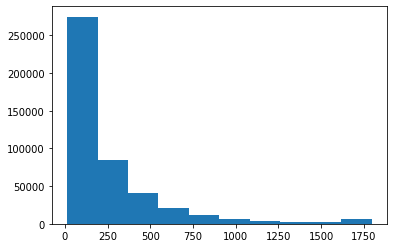

In [67]:
plt.hist(train['num_orders'])
;

it is a skewed distribution so we need to convert the data into normal distribution by using log transformation

In [23]:
train['num_orders']=np.log(train['num_orders'])

''

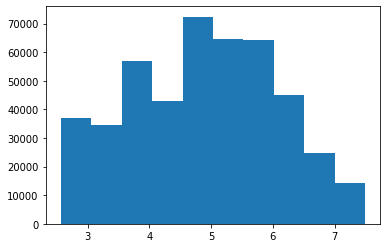

In [74]:
plt.hist(train['num_orders'])
;

It is converted into normal distribution

# Autocorrelation in the target variable

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([0.9458868 , 0.94114275, 0.94189321, 0.94625682, 0.95133293,
        0.94740265, 0.9403975 , 0.93232785, 0.94685052, 0.96675241,
        1.        , 0.96675241, 0.94685052, 0.93232785, 0.9403975 ,
        0.94740265, 0.95133293, 0.94625682, 0.94189321, 0.94114275,
        0.9458868 ]),
 <matplotlib.lines.Line2D at 0x1acb2c99f98>)

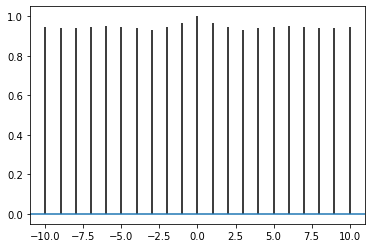

In [83]:
plt.acorr(train['num_orders'],maxlags=10)

In [24]:
time_1= train['num_orders'].shift(+1).to_frame()
time_2= train['num_orders'].shift(+2).to_frame()
time_3= train['num_orders'].shift(+3).to_frame()

In [25]:
time=pd.concat([time_1,time_2,time_3,train['num_orders']],axis=1)

In [26]:
time.columns=['time_1','time_2','time_3','num_orders']

In [82]:
time.corr()

,time_1,time_2,time_3,num_orders
time_1,1.000000,0.428519,0.086462,0.428519
time_2,0.428519,1.000000,0.428518,0.086463
time_3,0.086462,0.428518,1.000000,-0.163133
num_orders,0.428519,0.086463,-0.163133,1.000000


In [27]:
train=pd.concat([train,time['time_1']],axis=1)

In [28]:
train.head()

,id,center_id,meal_id,base_price,emailer_for_promotion,homepage_featured,num_orders,discount,time_1
0,1379560,161.793432,715.768211,152.29,0,0,5.176150,-15.46,NaN
1,1466964,161.793432,587.012954,135.83,0,0,5.598422,1.00,5.176150
2,1346989,161.793432,308.941058,135.86,0,0,5.241747,-1.00,5.598422
3,1338232,161.793432,42.813462,437.53,0,0,3.988984,-98.03,5.241747
4,1448490,161.793432,104.224804,242.50,0,0,3.688879,1.00,3.988984


In [31]:
train.drop('id',axis=1,inplace=True)

In [29]:
train.dropna(inplace=True)

# Scaling the data

In [36]:
pip install sklearn.preprocessing

Note: you may need to restart the kernel to use updated packages.


  ERROR: Could not find a version that satisfies the requirement sklearn.preprocessing (from versions: none)
ERROR: No matching distribution found for sklearn.preprocessing


In [32]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
norm=scaler.fit_transform(train)

In [33]:
norm=pd.DataFrame(norm)

In [34]:
norm.columns=train.columns

In [35]:
norm.head()

,center_id,meal_id,base_price,emailer_for_promotion,homepage_featured,num_orders,discount,time_1
0,-1.004194,1.729387,-1.358468,-0.297187,-0.350124,0.602358,0.482159,0.253432
1,-1.004194,0.293791,-1.358281,-0.297187,-0.350124,0.307635,0.439912,0.602358
2,-1.004194,-1.080140,0.518761,-0.297187,-0.350124,-0.727531,-1.609700,0.307635
3,-1.004194,-0.763093,-0.694749,-0.297187,-0.350124,-0.975509,0.482159,-0.727531
4,-1.004194,-0.847069,-0.634208,-0.297187,-0.350124,-1.270232,0.439912,-0.975509


In [63]:
x=norm.drop(columns=['num_orders'],axis=1)
y=norm['num_orders']

In [64]:
x=pd.DataFrame(x_train)
y=pd.DataFrame(y_train)

In [65]:
# spliting the data into train and test
# since it is a time series data we have to split differently 
train_size=0.7*len(x_train)
train_size=int(train_size)

x_train=x.iloc[0:train_size,:]
x_test=x.iloc[train_size:,:]

y_train=y.iloc[0:train_size,:]
y_test=y.iloc[train_size:,:]

In [66]:
y_test.head()

,num_orders
48243,0.023463
228513,-1.842984
398754,1.551920
61339,-1.842984
278314,-0.402757


In [53]:
x_train.shape

(239686, 7)

In [54]:
y_train.shape

(239686, 1)

# Applying the model

In [55]:
#Random forest modelling
from sklearn.ensemble import RandomForestRegressor
RF_model= RandomForestRegressor(n_estimators=100,max_features=3).fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [67]:
predictions= RF_model.predict(x_test)

In [68]:
RF_rmse=np.sqrt(mean_squared_error(y_test['num_orders'],predictions))

In [69]:
RF_rmse

0.16947512594988834

Random Forest gave the less error compared to other alogorithms